In [13]:
#Importing all packages
import matplotlib.pyplot as plt
import pandas as pd
import os
# all of the core functions are in the online_gc_utils.py file. if you place your notebook somewhere else, paste this file in the same directory
import FTS_Analysis_GC as fts


In the cell below place all your variables and parameters from your experiment. Extract the data from the GC computer via 'Brams method'. IMPORTANT: Make sure to place in your experiment_path a folder called 'chromatograms' where all the raw chomatograms in .txt files are placed, from the FID, TCD_AuxLeft, and TCD_AuxRight

In [ ]:
#Establish where the data is, and selecting the experiment
root = r"FTS_GC_AnalysisRC" # if your data is somewhere else, change this path
experiment_name = 'example_data/' # change this to the name of your experiment
experiment_path = os.path.join(root, experiment_name)

#Reactant concentration in the gas mixture before the reactor (between 0 and 1)
ReactantConc = {
    'CO': 0.25, # molar fraction of CO
    'CO2': 0.0, # molar fraction of CO2
    'H2': 0.5, # molar fraction of H2
    'Ar': 0.075, # molar fraction of Ar
    'N2': 0.175, # molar fraction of N2
}

#Calculate conversion based on reactant 'CO'
Reactant = 'CO' # select the reactant for conversion calculation
#Calculate conversion based on product 'C1'
#product = 'C1' # select the reactant for conversion calculation

#Concentration of internal standard in the gas mixture bbefore the reactor
IntStand = 'Ar' # internal standard
ISConc =  0.075 

#Intergration parameters for the FID and TCD detectors
# peak_list = [['Compound', [start, end], two_point_baselineYes/NO]]
FID_peaks = [
    ['C1', [1.8474, 1.894], False],
    ['C2', [1.894, 2.005], False],
    ['C3', [2.005, 2.110], True],
    ['C4', [2.300, 2.500], True],
]
TCDLeft_peaks = [
    ['CO2', [3.53, 3.95], True],
    ['CO', [7.90, 9.72], True],
    ['Ar', [5.45, 5.93], True],
]

#Correction factors for the FTS setup for 40 ml/min of total gas flow
# Date: 
C1 = 686.992
FTCorrectionFactorsDict = {
'C1' : C1,
'C2' : C1 * 2,
'C3' : C1 * 3,
'C4' : C1 * 4,
'CO2': 140.03,
'CO' : 114.59,
'Ar' : 128.49,
'H2' : 84.894
}



The collect_chromatogram_files function searches the given experiment directory for chromatogram files (FID, TCD_AuxLeft, TCD_AuxRight), categorizes them into lists, and loads the first file from each type into a DataFrame. This will tell you the number of injections

In [15]:

FIDList, AuxLeftList, AuxRightList, FID_0, AuxLeft_0, AuxRight_0=fts.collect_chromatogram_files(experiment_path)
print('number of injections = ' + str(len(FIDList)))

number of injections = 116


The chromatogram function processes a list of chromatogram files (e.g., FID, AuxLeft, AuxRight), aligns them based on time relative to the earliest FID file, and returns a combined DataFrame saved as a CSV file. This can take a while depending on the amount of injections and computer power. Aprox 60 seconds
You only have to do this once to load your data

In [16]:

# Process FID
FID_DF = fts.chromatogram(FIDList, 'FID', FIDList, output_path=experiment_path, output_name='FID_total1.csv')

# Process AuxLeft
AuxLeft_DF = fts.chromatogram(AuxLeftList, 'AuxLeft', FIDList, output_path=experiment_path, output_name='AuxLeft_total1.csv')

# Process AuxRight
AuxRight_DF = fts.chromatogram(AuxRightList, 'AuxRight', FIDList, output_path=experiment_path, output_name='AuxRight_total1.csv')
FID_DF

,0,21,43,64,85,106,128,149,170,192,...,2258,2279,2300,2322,2343,2364,2385,2407,2428,2449
Time,,,,,,,,,,,,,,,,,,,,,
0.000000,12.310286,12.278335,12.379499,12.402866,12.356176,12.349878,12.418046,12.344204,12.510180,12.498064,...,13.041723,13.221258,13.247581,13.294311,13.199682,13.308558,13.089033,13.208440,13.116441,13.162021
0.000667,12.327240,12.254577,12.383293,12.398455,12.386440,12.370667,12.440228,12.362480,12.471328,12.509548,...,13.038409,13.189585,13.231373,13.284803,13.234736,13.301084,13.107759,13.215845,13.121799,13.143909
0.001333,12.318433,12.256440,12.347369,12.386440,12.371293,12.361850,12.419955,12.348623,12.501263,12.482150,...,13.041064,13.199009,13.182867,13.292281,13.227321,13.284133,13.101729,13.205742,13.139892,13.137201
0.002000,12.314051,12.224628,12.363098,12.394650,12.403500,12.324093,12.417419,12.346101,12.492344,12.492344,...,13.005854,13.183527,13.185546,13.291581,13.242179,13.280065,13.115763,13.184199,13.143247,13.125149
0.002667,12.339808,12.263319,12.372556,12.388971,12.399707,12.334782,12.388971,12.346725,12.502525,12.515917,...,12.979997,13.208440,13.176811,13.298376,13.189585,13.270583,13.103067,13.105738,13.116441,13.119126
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19.997333,12.366886,12.287714,12.420582,12.373827,12.388971,12.370044,12.453553,12.470698,12.445298,12.406040,...,15.960239,15.783206,15.172960,14.735763,14.214470,14.105254,13.752532,13.612835,13.424496,13.307878
19.998000,12.367511,12.302138,12.414890,12.346725,12.378861,12.380751,12.455447,12.462430,12.473245,12.421844,...,15.934946,15.843079,15.184592,14.692894,14.220989,14.096615,13.713262,13.600353,13.419707,13.309236
19.998667,12.314672,12.297735,12.397809,12.365617,12.378236,12.371931,12.482150,12.471964,12.464339,12.437682,...,15.909694,15.804214,15.192373,14.638187,14.170972,14.077197,13.733587,13.608001,13.427245,13.294311


In [17]:
# The following code is used to read the CSV files generated by the chromatogram function and make them readable   

FIDDF1 = pd.read_csv(experiment_path + '/FID_total1.csv', index_col=0, low_memory=False)
FIDDF1 = FIDDF1.replace(',', '', regex=True)
FIDDF1.columns = FIDDF1.columns.astype(float)
FIDDF1 = FIDDF1.sort_index(axis=1)

AuxRightDF1 = pd.read_csv(experiment_path + '/AuxRight_total1.csv', index_col=0, low_memory=False)
AuxRightDF1 = AuxRightDF1.replace(',', '', regex=True)
AuxRightDF1.columns = AuxRightDF1.columns.astype(float)
AuxRightDF1 = AuxRightDF1.sort_index(axis=1)

AuxLeftDF1 = pd.read_csv(experiment_path + '/AuxLeft_total1.csv', index_col=0, low_memory=False)
AuxLeftDF1 = AuxLeftDF1.replace(',', '', regex=True)
AuxLeftDF1.columns = AuxLeftDF1.columns.astype(float)
AuxLeftDF1 = AuxLeftDF1.sort_index(axis=1)
FIDDF1.head(5)

,0.0,21.0,43.0,64.0,85.0,106.0,128.0,149.0,170.0,192.0,...,2258.0,2279.0,2300.0,2322.0,2343.0,2364.0,2385.0,2407.0,2428.0,2449.0
Time,,,,,,,,,,,,,,,,,,,,,
0.000000,12.310286,12.278335,12.379499,12.402866,12.356176,12.349878,12.418046,12.344204,12.510180,12.498064,...,13.041723,13.221258,13.247581,13.294311,13.199682,13.308558,13.089033,13.208440,13.116441,13.162021
0.000667,12.327240,12.254577,12.383293,12.398455,12.386440,12.370667,12.440228,12.362480,12.471328,12.509548,...,13.038409,13.189585,13.231373,13.284803,13.234736,13.301084,13.107759,13.215845,13.121799,13.143909
0.001333,12.318433,12.256440,12.347369,12.386440,12.371293,12.361850,12.419955,12.348623,12.501263,12.482150,...,13.041064,13.199009,13.182867,13.292281,13.227321,13.284133,13.101729,13.205742,13.139892,13.137201
0.002000,12.314051,12.224628,12.363098,12.394650,12.403500,12.324093,12.417419,12.346101,12.492344,12.492344,...,13.005854,13.183527,13.185546,13.291581,13.242179,13.280065,13.115763,13.184199,13.143247,13.125149
0.002667,12.339808,12.263319,12.372556,12.388971,12.399707,12.334782,12.388971,12.346725,12.502525,12.515917,...,12.979997,13.208440,13.176811,13.298376,13.189585,13.270583,13.103067,13.105738,13.116441,13.119126


Baseline corrections: The following code is used to correct the baseline of the chromatograms. 

In [18]:
FIDDF_corr = FIDDF1.apply(lambda col: fts.baseline_correct_column(col, FIDDF1.index, 0, 0.25))
FIDDF_corr.head(5)

,0.0,21.0,43.0,64.0,85.0,106.0,128.0,149.0,170.0,192.0,...,2258.0,2279.0,2300.0,2322.0,2343.0,2364.0,2385.0,2407.0,2428.0,2449.0
Time,,,,,,,,,,,,,,,,,,,,,
0.000000,0.010717,-0.021961,0.045139,0.063696,0.004994,-0.015651,0.022495,-0.038558,0.097211,0.103846,...,0.001307,0.037395,0.043040,0.107196,-0.062931,0.062314,-0.122554,0.052282,-0.036635,0.061984
0.000667,0.027671,-0.045719,0.048933,0.059285,0.035258,0.005138,0.044677,-0.020282,0.058359,0.115330,...,-0.002007,0.005722,0.026832,0.097688,-0.027877,0.054840,-0.103828,0.059687,-0.031277,0.043872
0.001333,0.018864,-0.043856,0.013009,0.047270,0.020111,-0.003679,0.024404,-0.034139,0.088294,0.087932,...,0.000648,0.015146,-0.021674,0.105166,-0.035292,0.037889,-0.109858,0.049584,-0.013184,0.037164
0.002000,0.014482,-0.075668,0.028738,0.055480,0.052318,-0.041436,0.021868,-0.036661,0.079375,0.098126,...,-0.034562,-0.000336,-0.018995,0.104466,-0.020434,0.033821,-0.095824,0.028041,-0.009829,0.025112
0.002667,0.040239,-0.036977,0.038196,0.049801,0.048525,-0.030747,-0.006580,-0.036037,0.089556,0.121699,...,-0.060419,0.024577,-0.027730,0.111261,-0.073028,0.024339,-0.108520,-0.050420,-0.036635,0.019089


 Do intergrations and plotting the raw areas against time on steam

C:\Users\6855245\AppData\Local\Temp\ipykernel_36444\4024008477.py:15: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  area_totalFig.show()


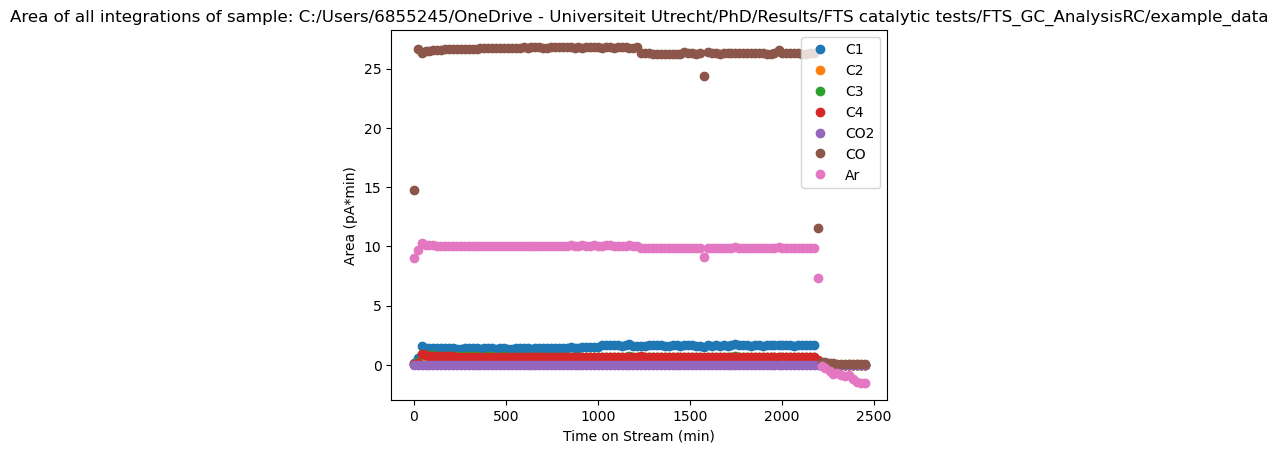

In [19]:
area_FIDDF = fts.integrate_named_peaks(FIDDF_corr, FID_peaks)
area_AuxLeft = fts.integrate_named_peaks(AuxLeftDF1, TCDLeft_peaks)
area_totalDF = pd.concat([area_FIDDF, area_AuxLeft], axis=1)
area_totalDF.index.name = "Time_Point"

area_totalFig = plt.figure()
area_totalFigAx = area_totalFig.add_subplot()
for name in area_totalDF.columns:
    area_totalFigAx.plot(area_totalDF[name], label=name, linestyle='',
                                                  marker='o')
area_totalFigAx.legend()
area_totalFigAx.set_xlabel('Time on Stream (min)')
area_totalFigAx.set_ylabel('Area (pA*min)')
area_totalFigAx.title.set_text('Area of all integrations of sample: ' + experiment_path)
area_totalFig.show()
area_totalDF.to_excel(experiment_path + '/Raw_Areas.xlsx')

Converting the area into amounts by using the correction factor. This correciton is done by dividing the area of the peak by the correction factor of that corresponding peak

C:\Users\6855245\AppData\Local\Temp\ipykernel_36444\2458317825.py:24: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  AmountsFig.show()


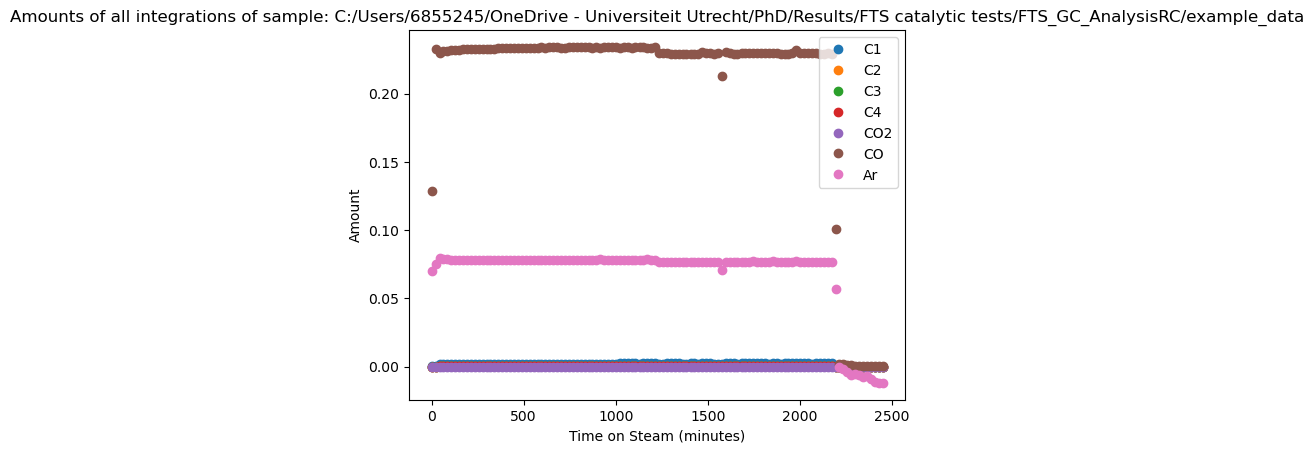

In [20]:
AmountsDF = pd.DataFrame(index=area_totalDF.index)
NoIntegrationValues = [] # Keep track of any peak names for which no correction factor is defined

# Loop through each column (peak name) in the area_totalDF DataFrame
for name in area_totalDF.columns:
    try: # Divide the integrated area by the correction factor to get the amount
        AmountsDF[name] = area_totalDF[name]/FTCorrectionFactorsDict[name]
    except: # If the correction factor is missing, print a message and add to the list
        print('No integration value defined for '+ name)
        NoIntegrationValues.append(name)
if NoIntegrationValues: # If there are missing correction factors, show an error message
    messagebox.showerror('Calibration value error', 'No calibration value (correction factor) defined for: ' + str(NoIntegrationValues))
AmountsDF = AmountsDF.sort_index() # Sort the DataFrame by index (Time_Point)

# Plot the calculated amounts for each peak as a function of time
AmountsFig = plt.figure()
AmountsFigAx = AmountsFig.add_subplot()
for name in AmountsDF.columns:
    AmountsFigAx.plot(AmountsDF[name], label=name, linestyle='', marker='o')
AmountsFigAx.legend()
AmountsFigAx.set_xlabel('Time on Steam (minutes)')
AmountsFigAx.set_ylabel('Amount')
AmountsFigAx.title.set_text('Amounts of all integrations of sample: ' + experiment_path)
AmountsFig.show()

# Save the calculated amounts to an Excel file
AmountsDF.to_excel(experiment_path + '/Amounts_not_corrected_factor_between_0and1.xlsx')

Argon internal standaard correction: The GasContractionFactor is calculated for each injection by dividing the internal standaard concentration in the GC by the internal standaard concentration before the reactor (from your MFC's). 
C5+ selectivity can be calculated by substracting the unconverted CO and all the C1-C4 and CO2 product from the incoming CO
Only valid when assuming complete carbon balance (no coke formation)

C:\Users\6855245\AppData\Local\Temp\ipykernel_36444\687688044.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  IntStandAmountsFig.show()


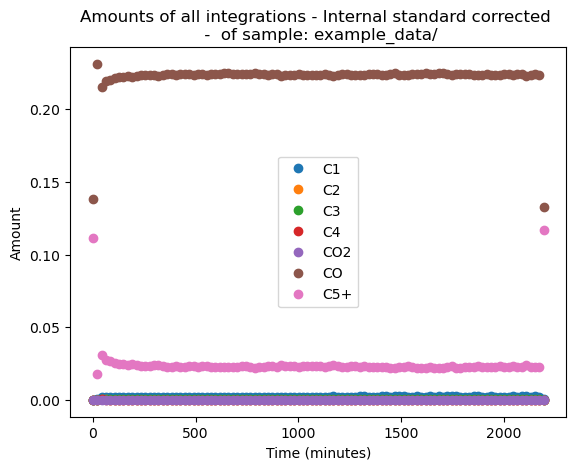

In [21]:
isDF = AmountsDF.copy()
isDF['GasContractionFactor'] = isDF[IntStand] / ISConc
isDF = isDF[isDF['GasContractionFactor'] > 0.1]
isDF = isDF.div(isDF['GasContractionFactor'], axis=0)  
isDF = isDF.drop(columns=['GasContractionFactor', IntStand]) 
isDF['C5+'] =  ReactantConc['CO']-isDF['C1']-isDF['C2']-isDF['C3']-isDF['C4']-isDF['CO2']-isDF['CO']

isDF.to_excel(experiment_path + '/Amounts_internal_standard_corrected_factor_between_0and1.xlsx')
IntStandAmountsFig = plt.figure()
IntStandAmountsFigAx = IntStandAmountsFig.add_subplot()
for name in isDF.columns:
    IntStandAmountsFigAx.plot(isDF[name], label=name, linestyle='',marker='o')
IntStandAmountsFigAx.legend()
IntStandAmountsFigAx.set_xlabel('Time (minutes)')
IntStandAmountsFigAx.set_ylabel('Amount')
#IntStandAmountsFigAx.set_xlim(0, 1400)
#IntStandAmountsFigAx.set_ylim(0, 0.03)
IntStandAmountsFigAx.title.set_text('Amounts of all integrations - Internal standard corrected \n -  of sample: ' + experiment_name)
IntStandAmountsFig.show()


Calculate reactant and/or product conversion. This is based on the following formula conversion = ((set_concentration-reactant_amount)/set_concentration)*100. The values are taken from the internal standard corrected concentation fraction. Adjust the figure accordingly to better see your conversion

C:\Users\6855245\AppData\Local\Temp\ipykernel_36444\2389027585.py:21: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  ConversionPlot.show()


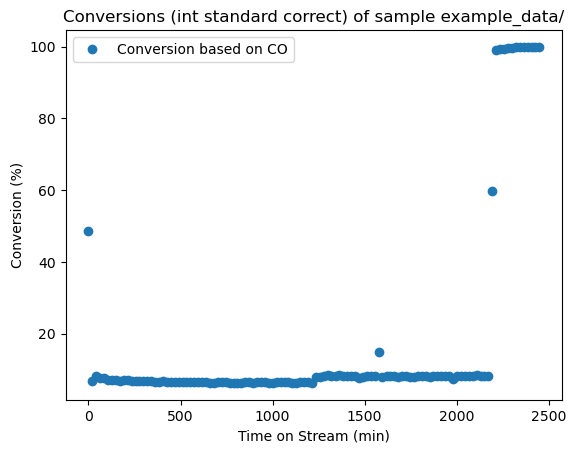

In [22]:
# Calculate conversion based on reactant
def calculate_conversion_based_on_reactant(isDF,reactant,set_concentration):
    reactant_amount = AmountsDF[reactant]
    conversion = ((set_concentration-reactant_amount)/set_concentration)*100
    return conversion

ReactantConversion = calculate_conversion_based_on_reactant(isDF,Reactant, ReactantConc[Reactant])
#ProductConversion = calculate_conversion_based_on_reactant(isDF,product, FTCorrectionFactorsDict['C1'])
ConversionPlot = plt.figure()
ConversionPlotAx = ConversionPlot.add_subplot()
ConversionPlotAx.plot(ReactantConversion, label='Conversion based on ' + Reactant,
                        linestyle='', marker='o')
#ConversionPlotAx.plot(ProductConversion, label='Conversion based on ' + product,
                       # linestyle='', marker='o')
ConversionPlotAx.legend()
ConversionPlotAx.set_xlabel('Time on Stream (min)')
ConversionPlotAx.set_ylabel('Conversion (%)')
#ConversionPlotAx.set_ylim(0, 20)  # Set y-axis from 0 to 20
#ConversionPlotAx.set_xlim(0, 3000)
ConversionPlotAx.title.set_text('Conversions (int standard correct) of sample ' + experiment_name)
ConversionPlot.show()
ConversionsDF = pd.concat([ReactantConversion], axis=1)
ConversionsDF.to_excel(experiment_path + '/conversions.xlsx')
